# Data Analysis for Both Walker Agents and Puncher Agents

#### Imports

In [2]:
import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
import src.helpers as h
# sns.set()
# pd.set_option('display.max_colwidth', None)
# plt.style.use('fivethirtyeight')
# plt.style.use('dark_background')
# plt.style.use('seaborn-bright')

## Training Data for Walkers

How does the data look for these training runs?

In [3]:
df = pd.read_csv('training_results/walker_T1/Walker.csv')
df.head()

,Steps,Policy/Entropy,Environment/Episode Length,Policy/Extrinsic Value Estimate,Environment/Cumulative Reward,Policy/Extrinsic Reward,Is Training
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3000.0,1.418939,22.653543,-0.019846,-5.164475,-5.164475,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6000.0,1.418939,25.000000,-0.018458,-5.830675,-5.830675,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data needs to be cleaned a little so there are no rows with `NaN`

In [4]:
df = pd.read_csv('training_results/walker_T1/Walker.csv')
df = df.dropna(axis=0)
df.head()

,Steps,Policy/Entropy,Environment/Episode Length,Policy/Extrinsic Value Estimate,Environment/Cumulative Reward,Policy/Extrinsic Reward,Is Training
1,3000.0,1.418939,22.653543,-0.019846,-5.164475,-5.164475,1.0
3,6000.0,1.418939,25.000000,-0.018458,-5.830675,-5.830675,1.0
5,9000.0,1.418939,22.728000,-0.021135,-5.356892,-5.356892,1.0
7,12000.0,1.418939,23.826446,-0.028654,-5.613264,-5.613264,1.0
9,15000.0,1.418938,22.857143,-0.028026,-5.959240,-5.959240,1.0


Timing data for the runs is grabbed for a few trainings

In [5]:
pd.set_option('display.max_colwidth', None)

In [ ]:
sac_times = get_timing_data('training_results/walker_SAC1/sac1_times.csv', header=None)
puncher_times = get_timing_data('training_results/puncher_2/Puncher_2_times.csv', header=None)

In [124]:
sac_times = get_timing_data('training_results/walker_SAC1/sac1_times.csv',header=None)
ppo_times = get_timing_data('training_results/walker_T15/ppo_times.csv',header=None)
ppo_3agents_times = get_timing_data('training_results/walker_3_agents/3_agents_times.csv',header=None)
ppo_6agents_times = get_timing_data('training_results/walker_6_agents/6_agents_times.csv',header=None)
ppo_9agents_times = get_timing_data('training_results/walker_9_agents/9_agents_times.csv',header=None)
ppo_30agents_times = get_timing_data('training_results/walker_30_agents/30_agents_times.csv',header=None)

## Walker Hyperparameter Data

#### Number of Hidden Layers

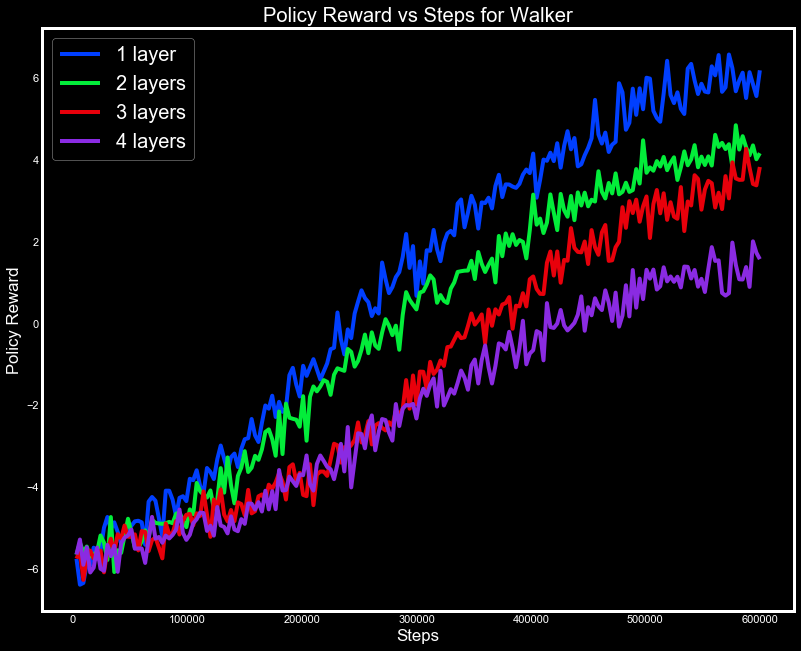

In [6]:
cols = ['Steps', 'Policy/Extrinsic Reward']
training_runs = ['walker_T6', 'walker_T4', 'walker_T5', 'walker_T7'] # order is funky but that's how I roll
labels = ['1 layer', '2 layers', '3 layers', '4 layers']
h.plot_multiple(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/reward_layers')

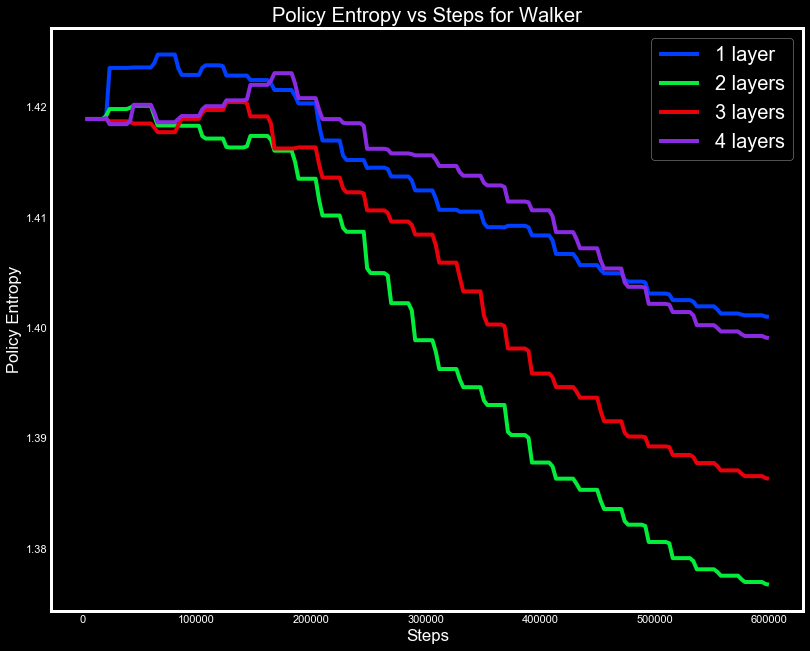

In [7]:
cols = ['Steps', 'Policy/Entropy']
training_runs = ['walker_T6', 'walker_T4', 'walker_T5', 'walker_T7'] # order is funky but that's how I roll
labels = ['1 layer', '2 layers', '3 layers', '4 layers']
h.plot_multiple(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/entropy_layers')

#### Learning Rates

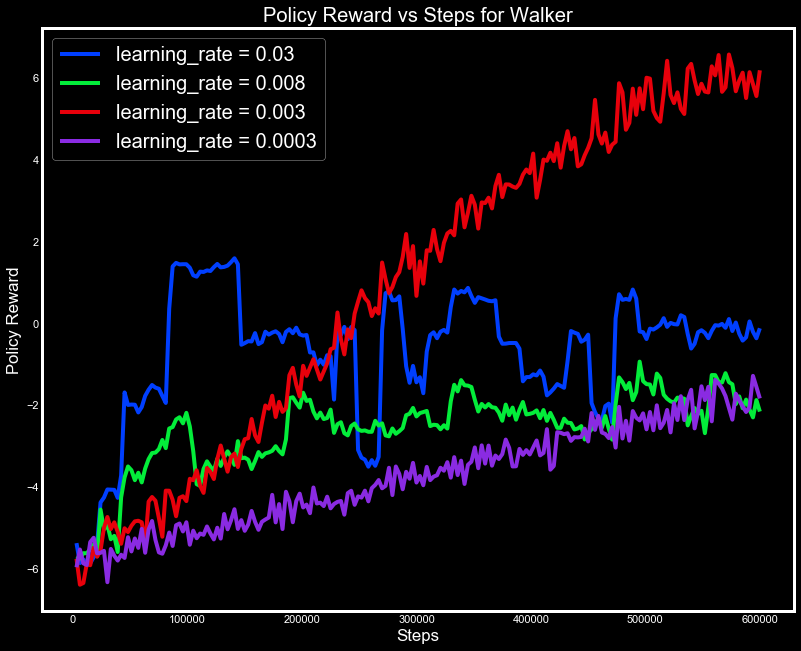

In [8]:
cols = ['Steps', 'Policy/Extrinsic Reward']
training_runs = ['walker_T9', 'walker_T10', 'walker_T6', 'walker_T8'] # order is funky but that's how I roll
labels = ['learning_rate = 0.03', 'learning_rate = 0.008', 'learning_rate = 0.003', 'learning_rate = 0.0003']
h.plot_multiple(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/reward_lr')

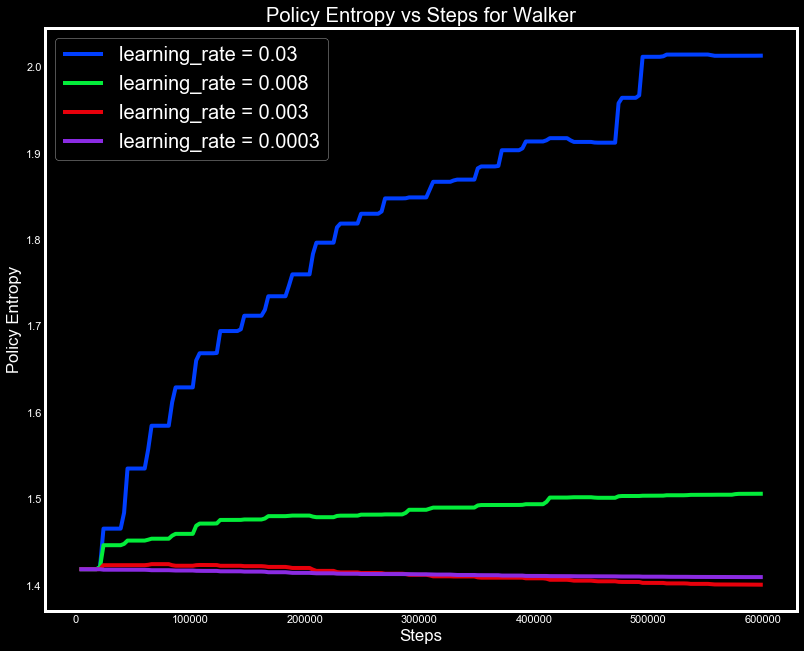

In [9]:
cols = ['Steps', 'Policy/Entropy']
training_runs = ['walker_T9', 'walker_T10', 'walker_T6', 'walker_T8'] # order is funky but that's how I roll
labels = ['learning_rate = 0.03', 'learning_rate = 0.008', 'learning_rate = 0.003', 'learning_rate = 0.0003']
h.plot_multiple(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/entropy_lr')

#### Using an RNN?

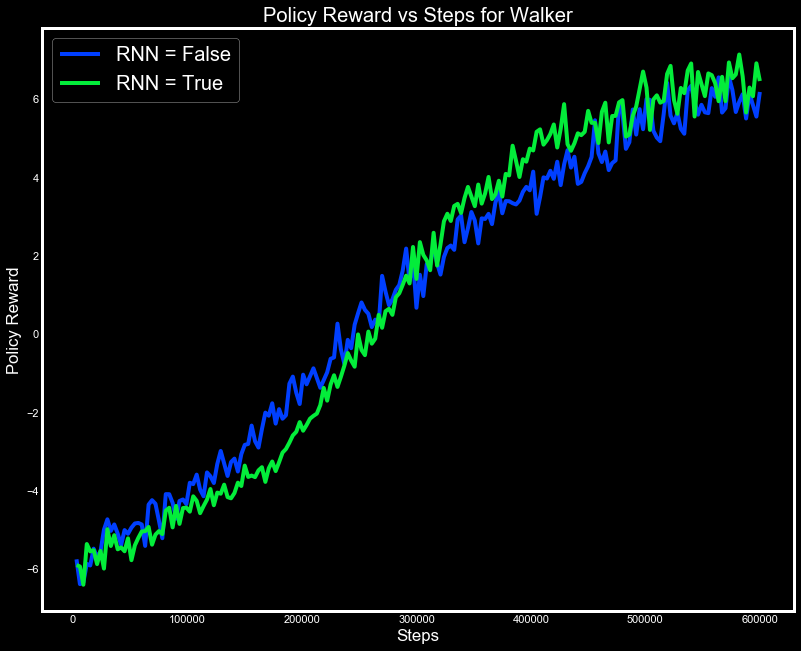

In [10]:
cols = ['Steps', 'Policy/Extrinsic Reward']
training_runs = ['walker_T6', 'walker_T11'] # order is funky but that's how I roll
labels = ['RNN = False', 'RNN = True']
h.plot_multiple(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/reward_NN')

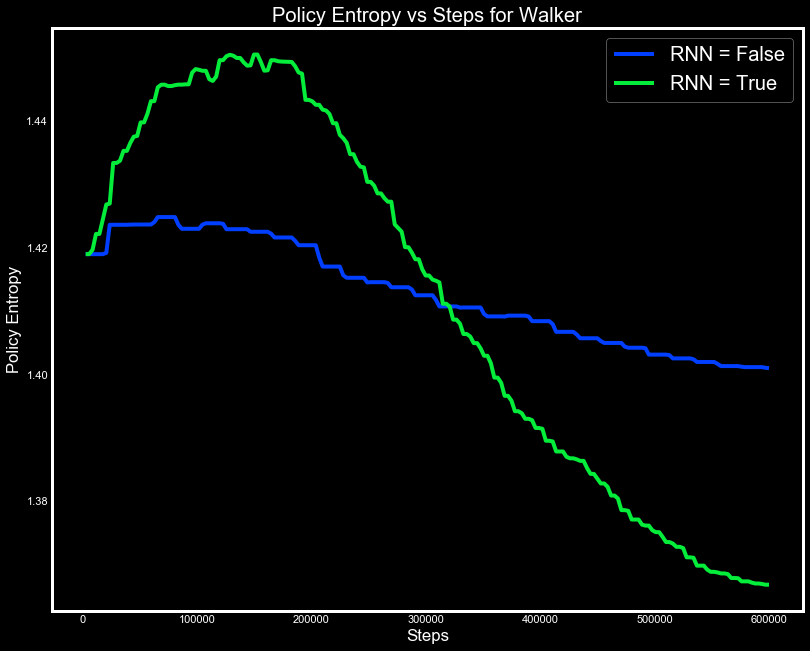

In [11]:
cols = ['Steps', 'Policy/Entropy']
training_runs = ['walker_T6', 'walker_T11'] # order is funky but that's how I roll
labels = ['RNN = False', 'RNN = True']
h.plot_multiple(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/entropy_NN')

#### Summary Frequencies

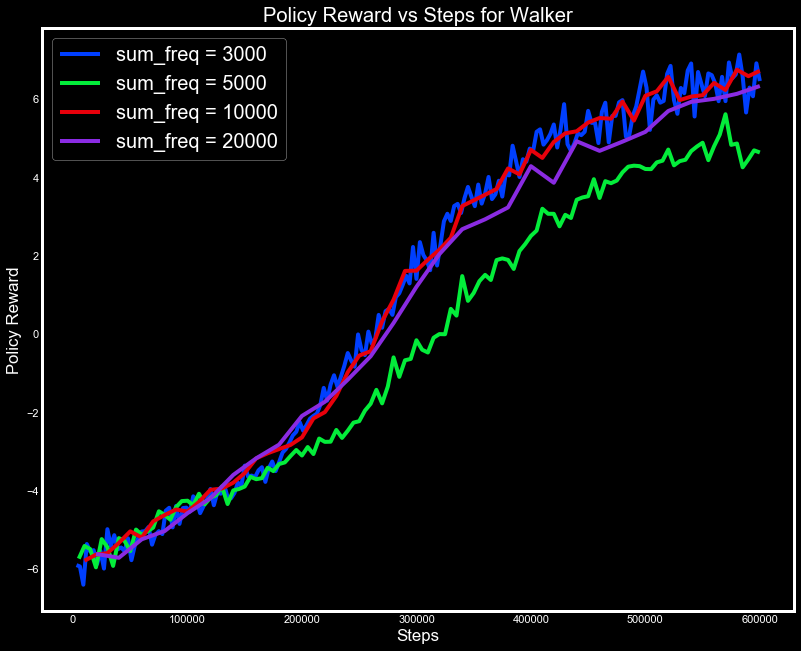

In [12]:
cols = ['Steps', 'Policy/Extrinsic Reward']
training_runs = ['walker_T11', 'walker_T12', 'walker_T13', 'walker_T14']
labels = ['sum_freq = 3000', 'sum_freq = 5000', 'sum_freq = 10000', 'sum_freq = 20000']
h.plot_multiple(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/reward_freq')

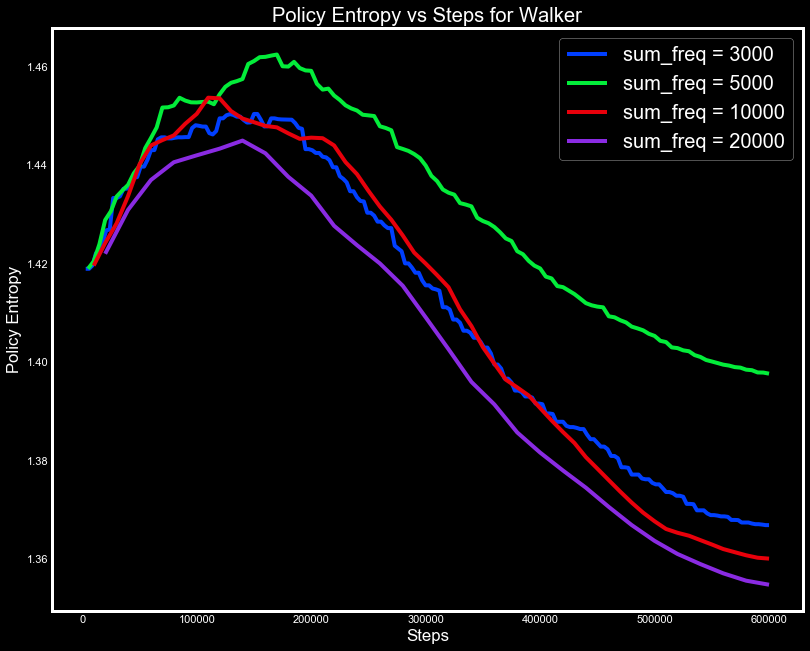

In [13]:
cols = ['Steps', 'Policy/Entropy']
training_runs = ['walker_T11', 'walker_T12', 'walker_T13', 'walker_T14']
labels = ['sum_freq = 3000', 'sum_freq = 5000', 'sum_freq = 10000', 'sum_freq = 20000']
h.plot_multiple(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/entropy_freq')

#### PPO vs SAC

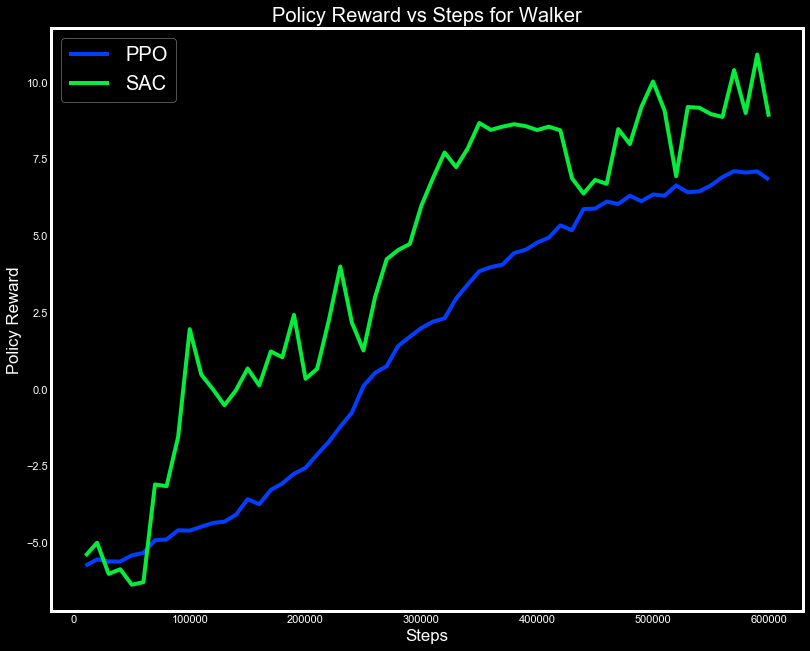

In [14]:
cols = ['Steps', 'Policy/Extrinsic Reward']
training_runs = ['walker_T15', 'walker_SAC1']
labels = ['PPO', 'SAC']
h.plot_multiple(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/reward_PPO_SAC')

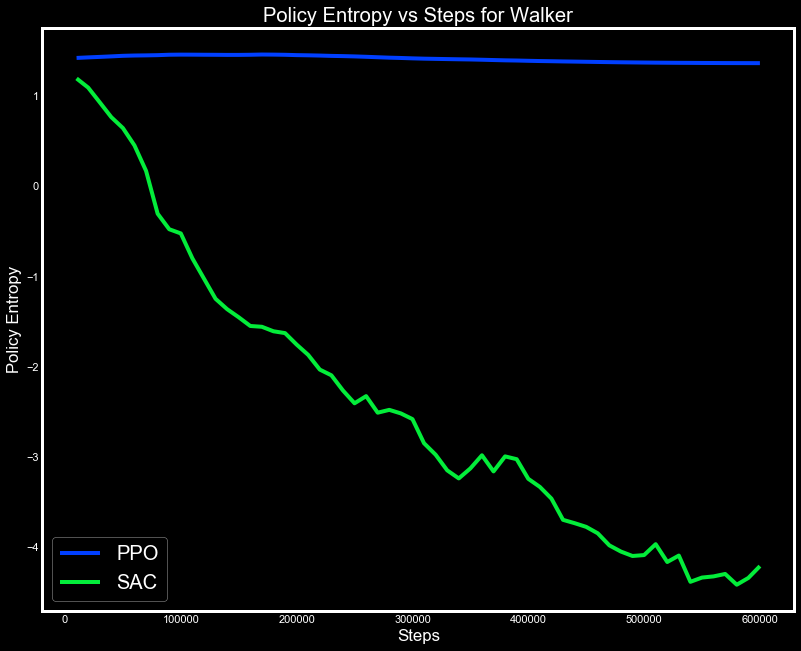

In [15]:
cols = ['Steps', 'Policy/Entropy']
training_runs = ['walker_T15', 'walker_SAC1']
labels = ['PPO', 'SAC']
h.plot_multiple(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/entropy_PPO_SAC')

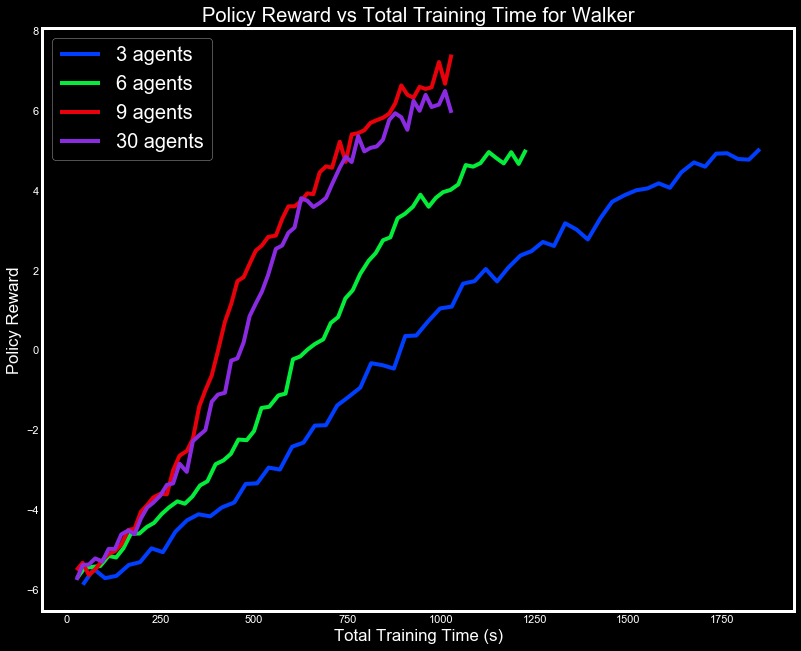

In [16]:
cols = ['Steps', 'Policy/Extrinsic Reward']
training_runs = ['walker_3_agents', 'walker_6_agents', 'walker_9_agents', 'walker_30_agents']
labels = ['3 agents', '6 agents', '9 agents', '30 agents']
h.plot_multiple_timing(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/test', timing_data=True)

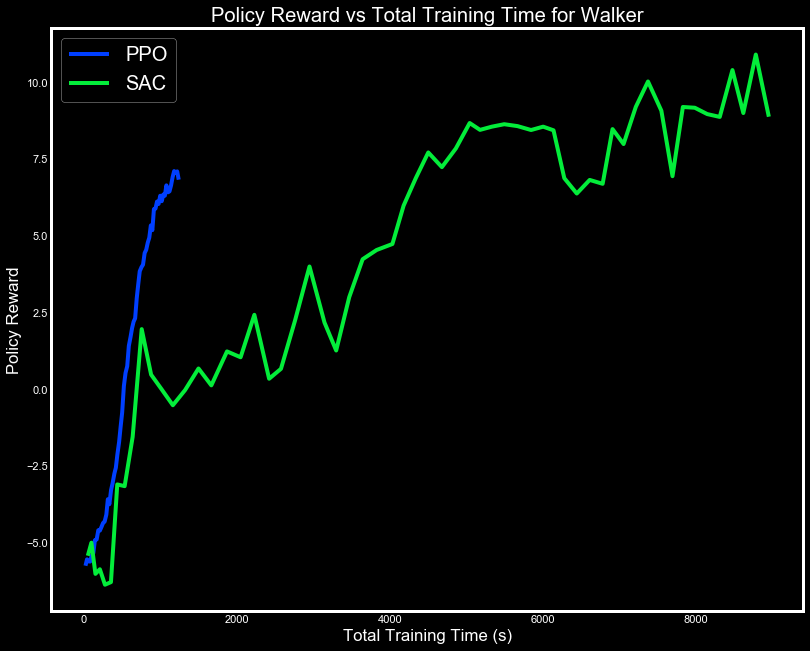

In [17]:
cols = ['Steps', 'Policy/Extrinsic Reward']
training_runs = ['walker_T15', 'walker_SAC1']
labels = ['PPO', 'SAC']
h.plot_multiple_timing(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/reward_PPO_SAC', timing_data=True)

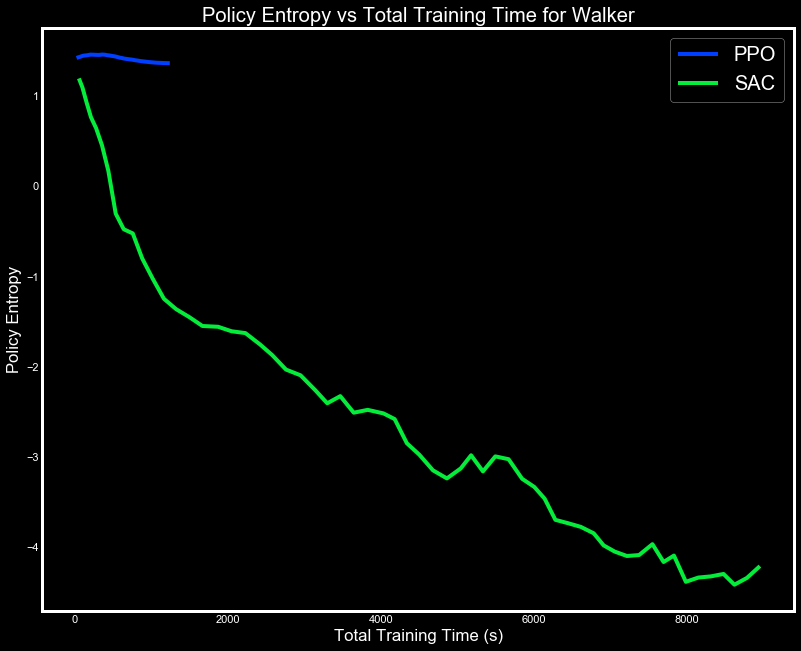

In [18]:
cols = ['Steps', 'Policy/Entropy']
training_runs = ['walker_T15', 'walker_SAC1']
labels = ['PPO', 'SAC']
h.plot_multiple_timing(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/entropy_PPO_SAC', timing_data=True)

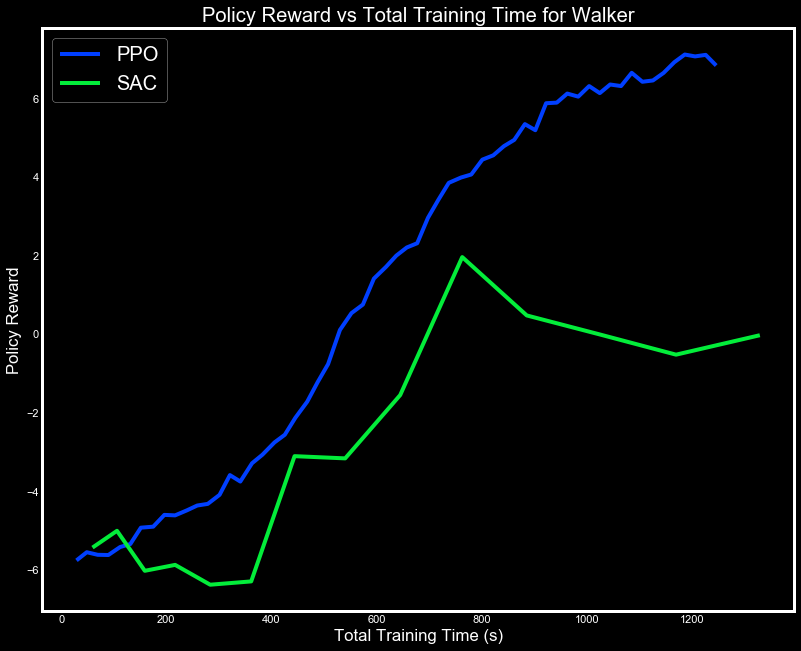

In [19]:
cols = ['Steps', 'Policy/Extrinsic Reward']
training_runs = ['walker_T15', 'walker_SAC1_trunc']
labels = ['PPO', 'SAC']
h.plot_multiple_timing(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/reward_PPO_SAC_trunc', timing_data=True)

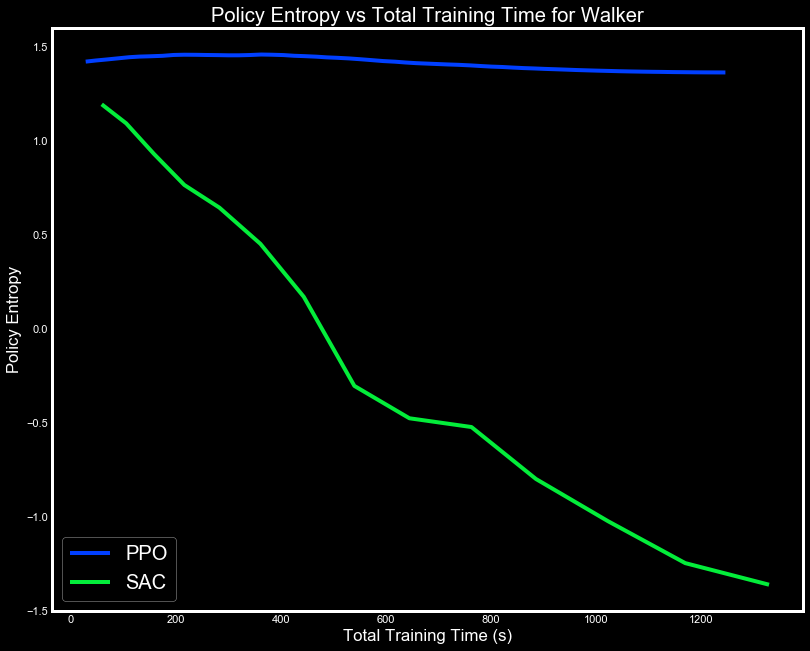

In [20]:
cols = ['Steps', 'Policy/Entropy']
training_runs = ['walker_T15', 'walker_SAC1_trunc']
labels = ['PPO', 'SAC']
h.plot_multiple_timing(training_runs, labels, 'Walker', cols[0], cols[1], savefig=True, save_name='images/entropy_PPO_SAC_trunc', timing_data=True)

### Information on runs and hyperparameters

Puncher_Run2 rewards(torque=10):

* Destroying target: 1

* Hitting target: 0.2

* Looking at target: (1/60) / s

* NOT looking at target (1/60) / s 

Puncher3 rewards(torque=20):

* Destroying target: 1

* Hitting target: 0.2

* __Looking at target: (2/60) / s__

* NOT looking at target (1/60) / s 

YAML File:

Puncher:
  trainer: ppo
  
  batch_size: 64
  
  beta: 0.001
  
  buffer_size: 12000
  
  epsilon: 0.2
  
  hidden_units: 128
  
  lambd: 0.99
  
  learning_rate: 0.0003
  
  learning_rate_schedule: linear
  
  max_steps: 5.0e6
  
  memory_size: 128
  
  normalize: true
  
  num_epoch: 3
  
  num_layers: 2
  
  time_horizon: 1000
  
  sequence_length: 64
  
  summary_freq: 12000
  
  use_recurrent: false
  
  vis_encode_type: simple
  
  reward_signals:
  
    extrinsic:
    
      strength: 1.0
      
      gamma: 0.99
